In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

from visualization.utils import plot_correlation_matrix, plot_scatterplot_matrix

init_notebook_mode(connected=True)

warnings.filterwarnings('ignore')
plt.rcParams ['figure.figsize'] = (13,8)
sns.set()
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('train.csv', sep=',')
pd.set_option('display.max_columns', 500)
df.head()

card_id  target delivery_type  addr_region_reg  addr_region_fact  \
0   cid_10620       1         cat_1              107               107   
1  cid_105724       0         cat_1                9                 9   
2  cid_101410       1         cat_1              109               109   
3   cid_38961       0         cat_1               66                66   
4   cid_57462       0         cat_1               16                16   

  channel_name channel_name_2 channel_name_modified_2018  \
0        cat_0          cat_3                      cat_0   
1        cat_2          cat_5                      cat_2   
2        cat_0          cat_3                      cat_0   
3        cat_0          cat_3                      cat_0   
4        cat_0          cat_3                      cat_0   

   sas_limit_after_003_amt  sas_limit_last_amt clnt_education_name  \
0                        1                   1               cat_1   
1                        3                   3               cat_1   
2                        1                   1               cat_1   
3                        3                   3               cat_1   
4                        0                   0               cat_4   

  clnt_marital_status_name clnt_employment_type_name  \
0                    cat_4                     cat_0   
1                    cat_2                     cat_3   
2                    cat_2                     cat_3   
3                    cat_2                     cat_3   
4                    cat_2                     cat_3   

  clnt_speciality_sphere_name  clnt_income_month_avg_net_amt  \
0                       cat_0                              3   
1                      cat_26                              5   
2                      cat_15                              2   
3                      cat_14                              2   
4                      cat_24                              3   

   clnt_expense_month_avg_amt  clnt_experience_cur_mnth  \
0                           0                       0.0   
1                           1                       2.0   
2                           0                       0.0   
3                           1                       0.0   
4                           0                       0.0   

   clnt_experience_cur_year  clnt_experience_total_mnth clnt_sex_name  \
0                       0.0                         0.0         cat_0   
1                       0.0                         3.0         cat_1   
2                       0.0                         0.0         cat_0   
3                       0.0                         0.0         cat_0   
4                       0.0                         0.0         cat_0   

   app_addr_region_reg  app_addr_region_fact  app_addr_region_sale prt_name  \
0                  107                   107                    45    cat_9   
1                    9                     9                     1    cat_8   
2                  109                   109                   109    cat_9   
3                   66                    66                    66    cat_9   
4                   16                    16                    16    cat_9   

  feature_0  clnt_birth_year  addr_region_fact_encoding1  \
0     cat_7               46                 6746.987952   
1     cat_9               47                 7469.879518   
2    cat_10               44                 7831.325301   
3     cat_7               27                 6746.987952   
4    cat_13               42                 7228.915663   

   addr_region_fact_encoding2  addr_region_reg_encoding1  \
0                 7159.090909                6746.987952   
1                 7500.000000                7469.879518   
2                 8068.181818                7831.325301   
3                 6704.545455                6746.987952   
4                 7272.727273                7228.915663   

   addr_region_reg_encoding2  app_addr_region_reg_encoding1  \
0  

In [3]:
df.columns

Index(['card_id', 'target', 'delivery_type', 'addr_region_reg',
       'addr_region_fact', 'channel_name', 'channel_name_2',
       'channel_name_modified_2018', 'sas_limit_after_003_amt',
       'sas_limit_last_amt', 'clnt_education_name', 'clnt_marital_status_name',
       'clnt_employment_type_name', 'clnt_speciality_sphere_name',
       'clnt_income_month_avg_net_amt', 'clnt_expense_month_avg_amt',
       'clnt_experience_cur_mnth', 'clnt_experience_cur_year',
       'clnt_experience_total_mnth', 'clnt_sex_name', 'app_addr_region_reg',
       'app_addr_region_fact', 'app_addr_region_sale', 'prt_name', 'feature_0',
       'clnt_birth_year', 'addr_region_fact_encoding1',
       'addr_region_fact_encoding2', 'addr_region_reg_encoding1',
       'addr_region_reg_encoding2', 'app_addr_region_reg_encoding1',
       'app_addr_region_reg_encoding2', 'app_addr_region_fact_encoding1',
       'app_addr_region_fact_encoding2', 'app_addr_region_sale_encoding1',
       'app_addr_region_sale_encod

In [24]:
len(df['fo'].dropna())

90000

In [25]:
df['fo'].value_counts()

0     66255
9      9120
4      4840
5      3214
7      2130
6      1873
8      1349
10      882
2       306
3        29
1         2
Name: fo, dtype: int64

In [58]:
regions.index

Int64Index([48, 71, 60, 62, 55, 9, 78, 52, 43, 31, 54, 84, 77, 42], dtype='int64')

In [83]:
df[(df['region']==42)&(df['app_addr_region_sale']==109)]

card_id  target delivery_type  addr_region_reg  addr_region_fact  \
11715  cid_111602       1         cat_1               54               109   
18315   cid_95409       0         cat_1               54                54   
56638   cid_32559       0         cat_1               54                54   
62737   cid_36093       0         cat_1               54                54   
64370  cid_124033       0         cat_1               54                54   

      channel_name channel_name_2 channel_name_modified_2018  \
11715        cat_0          cat_3                      cat_0   
18315        cat_0          cat_3                      cat_0   
56638        cat_0          cat_3                      cat_0   
62737        cat_0          cat_3                      cat_0   
64370        cat_0          cat_3                      cat_0   

       sas_limit_after_003_amt  sas_limit_last_amt clnt_education_name  \
11715                        1                   1               cat_1   
18315                        1                   1               cat_1   
56638                        2                   2               cat_4   
62737                        2                   2               cat_1   
64370                        1                   1               cat_4   

      clnt_marital_status_name clnt_employment_type_name  \
11715                    cat_2                     cat_3   
18315                    cat_2                     cat_3   
56638                    cat_2                     cat_3   
62737                    cat_2                     cat_3   
64370                    cat_4                     cat_3   

      clnt_speciality_sphere_name  clnt_income_month_avg_net_amt  \
11715                      cat_17                              6   
18315                      cat_17                              3   
56638                      cat_17                              2   
62737                      cat_26                              4   
64370                      cat_17                              1   

       clnt_expense_month_avg_amt  clnt_experience_cur_mnth  \
11715                           0                       0.0   
18315                           0                       0.0   
56638                           0                       0.0   
62737                           0                       0.0   
64370                           0                       0.0   

       clnt_experience_cur_year  clnt_experience_total_mnth clnt_sex_name  \
11715                       0.0                         0.0         cat_0   
18315                       0.0                         0.0         cat_1   
56638                       0.0                         0.0         cat_0   
62737                       0.0                         0.0         cat_0   
64370                       0.0                         0.0         cat_0   

       app_addr_region_reg  app_addr_region_fact  app_addr_region_sale  \
11715                   54                   109                   109   
18315                   54                    54                   109   
56638                   54                    54                   109   
62737                   54                    54                   109   
64370                   54                    54                   109   

      prt_name feature_0  clnt_birth_year  addr_region_fact_encoding1  \
11715    cat_9    cat_13               38                 7831.325301   
18315    cat_9     cat_7               42                 5301.204819   
56638    cat_9     cat_7               49                 5301.204819   
62737    cat_9    cat_13               35                 5301.204819   
64370    cat_9    cat_13               26                 5301.204819   

       addr_region_fact_encoding2  addr_region_reg_encoding1  \
11715                 8068.181818                5301.204819   
18315                 5681.818182                5301.204819   
56638                 5

In [76]:
regions = df[df['fo']==4]['region'].value_counts()
for v, region in zip(regions, regions.index):
    print(region, v, np.mean(df[df['region']==region]['addr_region_fact_encoding1']))

48 1525 7895.951017183485
71 795 7947.715389861333
60 731 7778.089100588397
62 385 7305.273040212797
55 353 7250.418103006926
9 319 7475.544812478753
78 181 7321.440457964452
52 109 6900.630043108211
43 103 7445.315241548714
31 88 6748.357064622123
54 80 6900.602409638554
84 70 6734.939759036143
77 61 6837.843175982618
42 40 6162.650602409639


In [46]:
df[df['fo']==10]['makro_region'].value_counts()

12    882
Name: makro_region, dtype: int64

In [43]:
df[df['fo']==9]['addr_region_reg'].value_counts()

56     2764
57     2221
20      348
112     294
10      277
       ... 
125       1
13        1
3         1
27        1
127       1
Name: addr_region_reg, Length: 82, dtype: int64

In [76]:
for c in df.columns:
    if len(df[c].unique()) > 99:
        print(c, len(df[c].unique()))

card_id 90000
last_loan_date 3701
first_loan_date 5353
inquiry_recent_period 621
inquiry_12_month 137
ttl_inquiries 302
feature_10 101
feature_12 101
feature_14 101
feature_15 100
feature_16 101
feature_17 101
feature_18 101
feature_22 101
feature_23 101
feature_24 101
feature_27 101
feature_28 17609
feature_29 1541


In [23]:
df.fo.unique()

array([ 0,  4,  9, 10,  7,  5,  8,  6,  2,  3,  1], dtype=int64)

In [ ]:
sns.distplot(df['fo'])

In [ ]:
plot_correlation_matrix(df[numerical].corr(), size=(50, 50))

In [ ]:
numerical = [c for c in df.columns if df[c].dtype.name != 'object']
#plot_scatterplot_matrix(df[numerical])

In [ ]:
df[numerical].hist()
plt.show()

<AxesSubplot:xlabel='fo', ylabel='Density'>

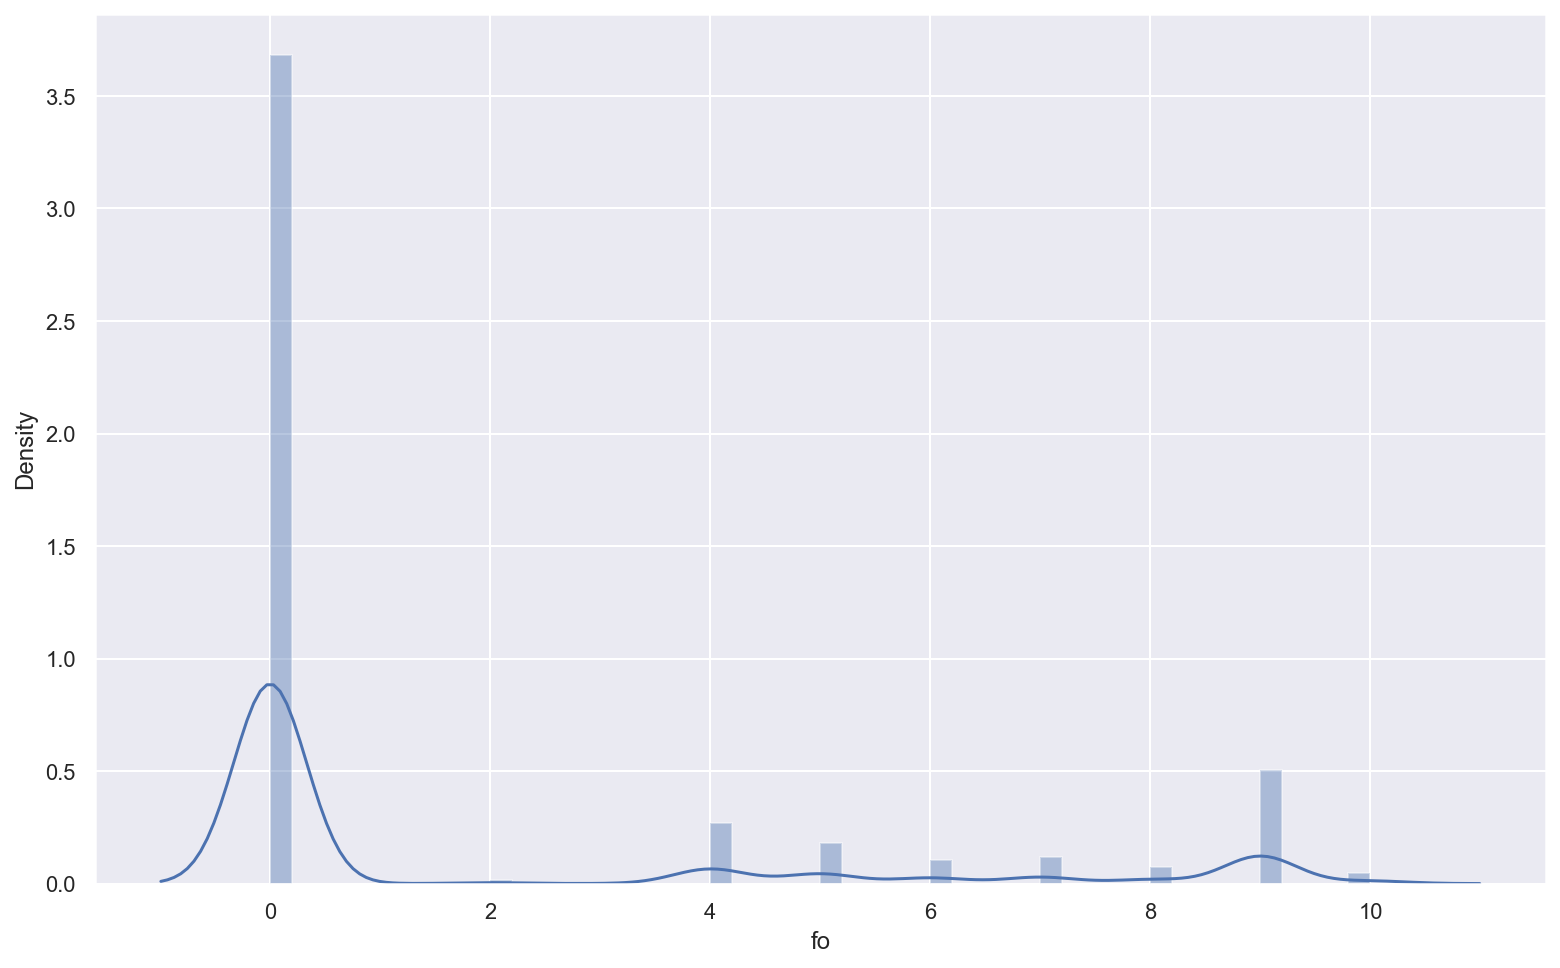

In [22]:
df[numerical].hist()
plt.show()

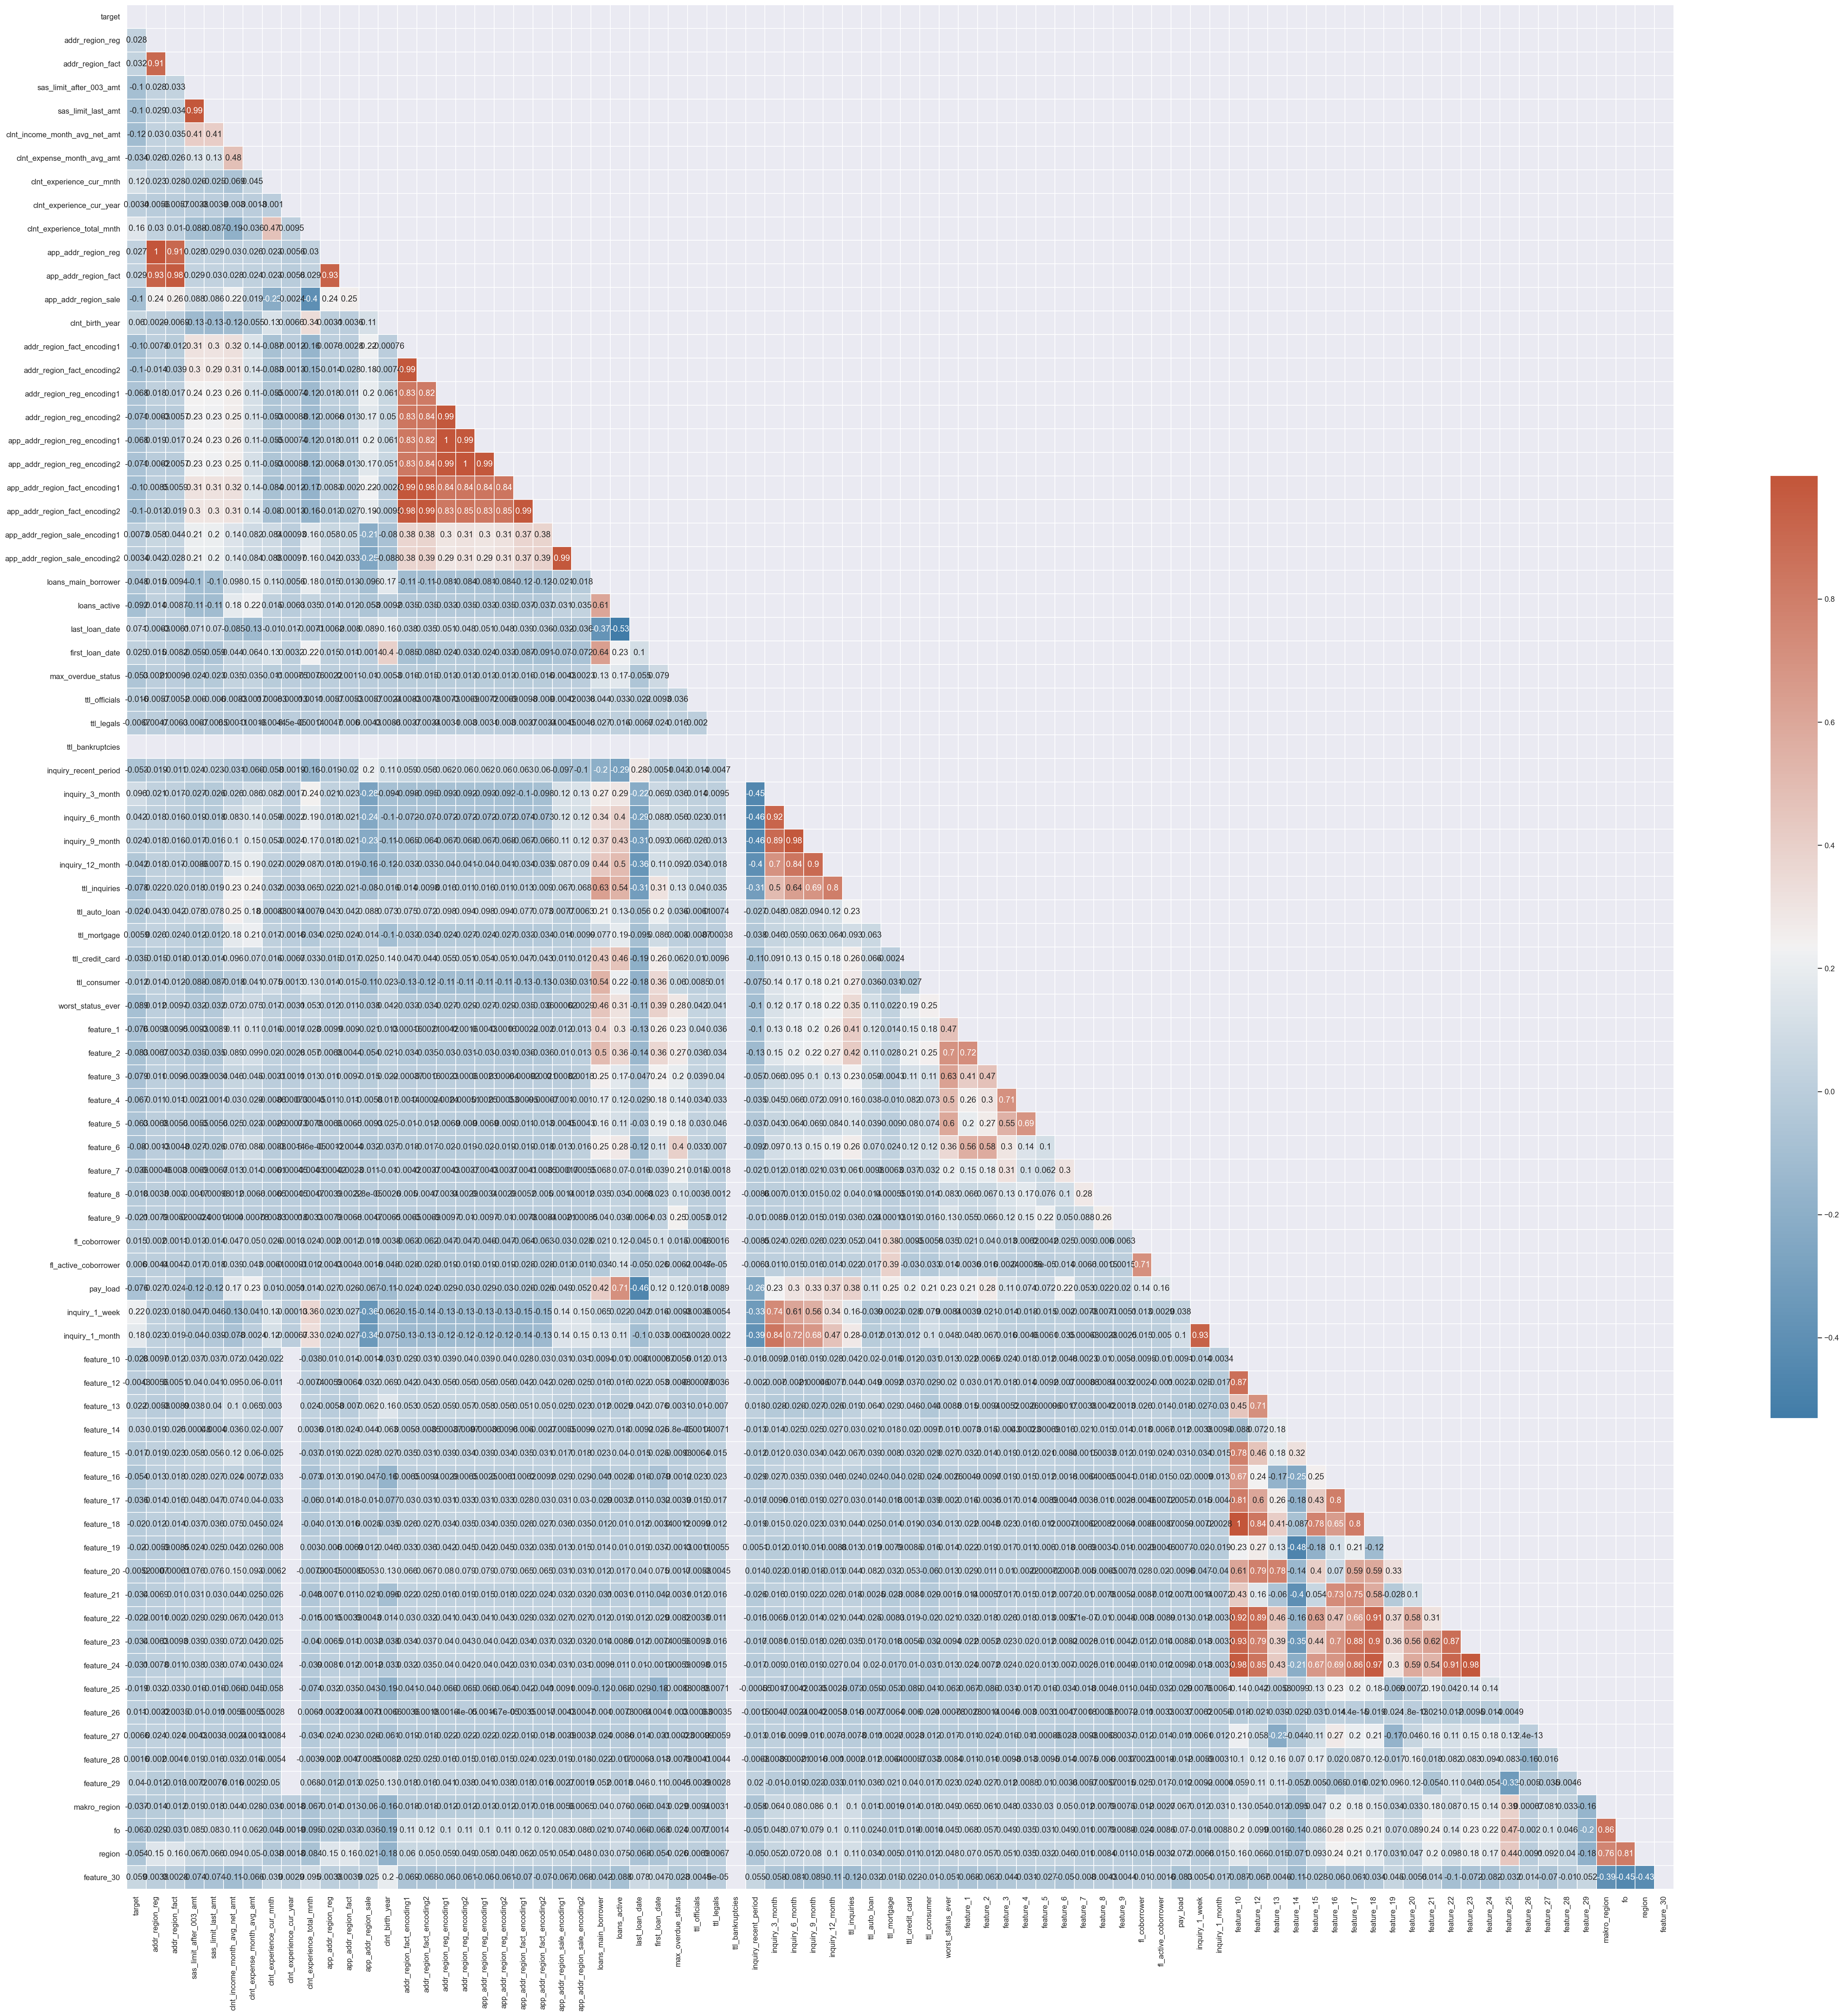

In [21]:
plot_correlation_matrix(df[numerical].corr(), size=(50, 50))

In [19]:
numerical = [c for c in df.columns if df[c].dtype.name != 'object']
#plot_scatterplot_matrix(df[numerical])

In [ ]:
df[numerical].hist()
plt.show()